From Rxx, and Gideon, I learned about this applied SME signal boosting on quadradic funding. 

It means that the quadradic funding algorithm is weighted heavier from donors that qualify as SME.

Congrats to the TEC coordination team for pulling this off. They pulled this off on round 1.

Let's apply engineering to this process.

Engineering is about the production of artifacts in a safe and ethical way. 

Artifacts have interfaces that people may use. Engineering allows the usage of interfaces without bad things happening.



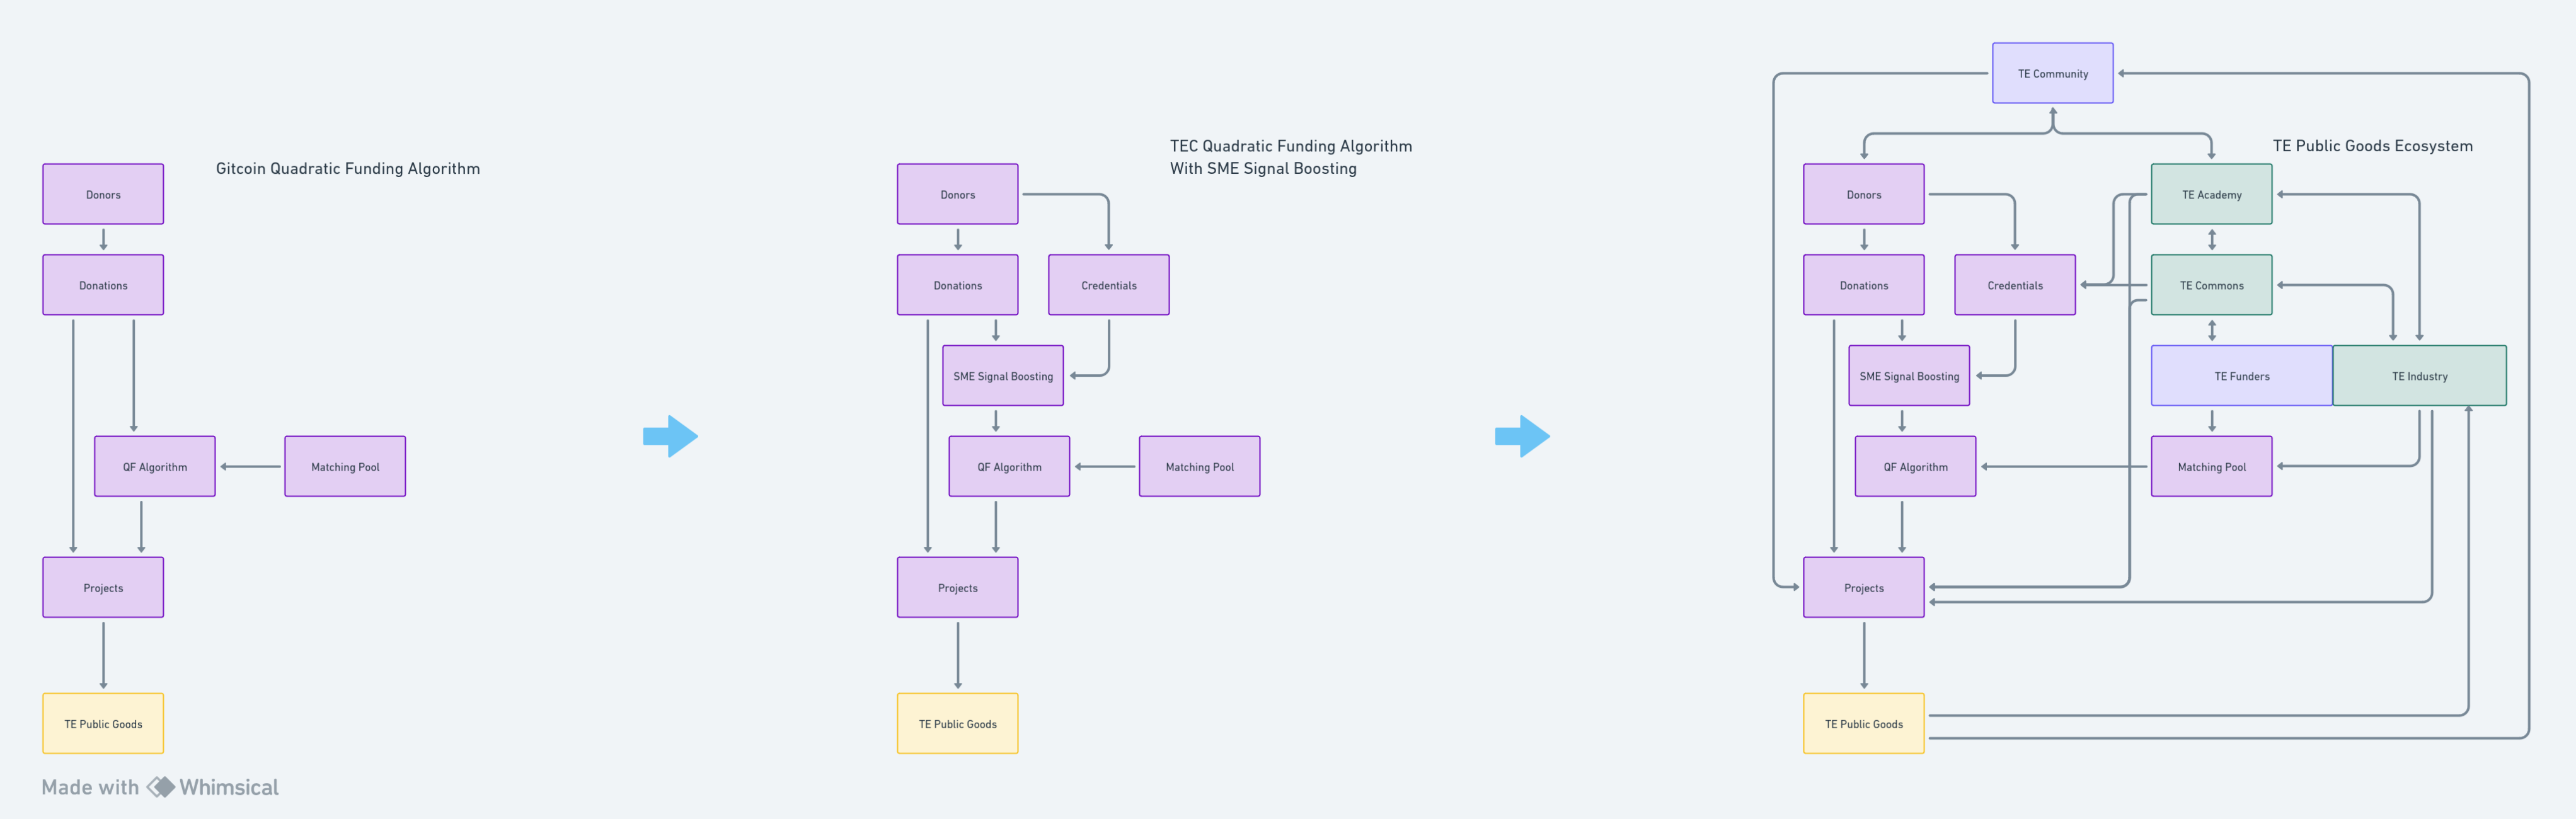![image.png]()

Link to the above board: https://whimsical.com/original-qfsme-mechanism-flowchart-QjXRdbkFmBcXBhnV175K9z 

Resources


* https://arxiv.org/pdf/2010.01193.pdf
* https://arxiv.org/pdf/1809.06421.pdf
* https://vitalik.ca/general/2019/12/07/quadratic.html
* https://qf.gitcoin.co/?grant=&grant=&grant=&match=1000
* https://medium.com/token-engineering-commons/expertise-and-quadratic-funding-bd4f0c5c3e23 

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

# A Flexible Design for Funding Public Goods

Bhuterin, Hitzig, Weyl on A Flexible Design for Funding Public Goods. 

https://arxiv.org/pdf/1809.06421.pdf

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

## 3.0 Model

This is the foundational setup in the paper.

In [1]:
import numpy as np

# Number of Citizens in the Society
N = 30

# Society is a set of citizens
society = list(range(N))

# Community is a random subset of the society. The community size is from 25 up to size of the society.
community = np.random.choice(a=list(society), size=np.random.randint(25, len(society)), replace=False, p=None)

# Public Goods are proposed by community members. Cardinality is from 20 up to size of the community.
public_goods = list(enumerate(np.random.choice(a=list(community), size=np.random.randint(20, len(community)), replace=True, p=None)))

In [2]:
community

array([20, 28,  0, 25, 22,  8, 16, 12,  3, 14, 29, 23, 18, 13,  5,  6, 24,
        2, 11, 19, 15,  7, 21,  9,  1,  4])

In [3]:
public_goods

[(0, 8),
 (1, 29),
 (2, 16),
 (3, 11),
 (4, 2),
 (5, 24),
 (6, 4),
 (7, 28),
 (8, 19),
 (9, 12),
 (10, 6),
 (11, 15),
 (12, 21),
 (13, 4),
 (14, 18),
 (15, 19),
 (16, 23),
 (17, 19),
 (18, 20),
 (19, 20),
 (20, 14)]

In [4]:
len(society)

30

In [5]:
len(community)

26

In [6]:
len(public_goods)

21

## 3.1 Individual Preferences and Actions

### Value Function Generators

The paper calls for 
* Concave, 
* Smooth, 
* Increasing preferences towards the funding of public goods.

The following function generator, generates value functions in the domain of {[0,1],[0,1]}.

In [7]:
import param
import numpy as np
import panel as pn
import hvplot.pandas
import pandas as pd

class ConcaveFunctionGenerator(param.Parameterized):
    f0 = param.Number(default=0.2, bounds=(0, 1), doc="Value of f(0)")
    f1 = param.Number(default=0.8, bounds=(0, 1), softbounds=(0, 1), doc="Value of f(1)")
    steepness = param.Number(default=5, bounds=(1, 20), doc="Steepness of the curve")

    def __init__(self, **params):
        super().__init__(**params)
        self._update_f1_bounds()

    @param.depends('f0', watch=True)
    def _update_f1_bounds(self):
        # Clip the value of f1 if it's below f0
        self.f1 = max(self.f0, self.f1)
        
        # Update the lower bound of f1 to be the value of f0
        self.param['f1'].bounds = (self.f0, 1)
        
    def x(self):
        return np.linspace(0, 1, 400)

    @param.depends('f0', 'f1', 'steepness')
    def f(self, x):
        # Using the negative exponential function as a base
        y = 1 - np.exp(-self.steepness * x)
        
        # Adjusting the function to start at f0 and end at f1
        y = self.f0 + (self.f1 - self.f0) * (y - y.min()) / (y.max() - y.min())
        
        return y

    @param.depends('f0', 'f1', 'steepness')
    def view(self):
        x = self.x()
        y = self.f(x)
        df = pd.DataFrame({'x': x, 'y': y})
        return df.hvplot.line(x='x', y='y', ylim=(0, 1.01))

concave_gen = ConcaveFunctionGenerator()
pn.Row(concave_gen.param, concave_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='ConcaveFunctionGenerator'...)
        [0] StaticText(value='<b>ConcaveFunctionGenerat...)
        [1] FloatSlider(name='F0', value=0.2)
        [2] FloatSlider(name='F1', start=0.2, value=0.8)
        [3] FloatSlider(end=20, name='Steepness', start=1, value=5)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

The concave value generator has the following properties:
1. f0 = f(0) is in [0,1]
2. f1 = f(1) is in [f0,1]
3. f(x) = 1 - e**(-s*x)
4. The negative exponential function provides a smooth, concave, increasing function from f0 to f1 with a parameterized steepness.

The class dynamically clips f1 to satisfy property 2. Such as in the following example:

In [8]:
ConcaveFunctionGenerator(f0=1,f1=0)

ConcaveFunctionGenerator(f0=1, f1=1, name='ConcaveFunctionGenerator00955', steepness=5)

Here we propose parameter generators for sampling concave functions

In [9]:
import numbergen as ng
import numpy as np


# For CurveGenerator
def concave_function_parameters_generator():
    return dict(
        f0=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.1, sigma=0.3), bounds=(0,1))(),
        f1=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.5, sigma=0.4), bounds=(0,1))(),
        steepness=ng.UniformRandom(lbound=1, ubound=20)(),
    )

This method generates random parameters given the distributions described for f0, f1, and steepness above. 
* f0 is a normal distribution at (0.1,0.3), clipped at (0,1)
* f0 is a normal distribution at (0.5,0.4), clipped at (0,1)
* steepness is a uniform distribution at (1,20)

In [10]:
concave_function_parameters_generator()

{'f0': 0.42014695359704457, 'f1': 0, 'steepness': 19.54499314082606}

In [11]:
value_functions = [ConcaveFunctionGenerator(**concave_function_parameters_generator()) for p_i in range(len(public_goods)*len(society))]

Here we can see all of the preferences of the citizens. These are the value functions V_p_i(F_p). There is one preference function for each V_p_i in {public_goods}X{citizens}. Cardinality is len(public_goods)*len(citizens).

#### Visualizing Sampled Value Functions

In [12]:
import pandas as pd

pd.DataFrame([s.param.values() for s in value_functions])

sample_p_i_slider = pn.widgets.IntSlider(name='Utility Value Function', start=0, end=len(value_functions)-1)

pn.Row(sample_p_i_slider, pn.bind(lambda i: value_functions[i].view(), i=sample_p_i_slider))

Row
    [0] IntSlider(end=629, name='Utility Value Function')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

#### Value Functions Dataset

Create a Dataframe! These are citizen preferences by funding amounts for public goods. Take Funding Amount as the Index by applying a transpose. 

In [13]:
df_value_functions = pd.DataFrame([s.f(s.x()) for s in value_functions])
df_value_functions = df_value_functions.T
df_value_functions.shape

(400, 630)

Make Funding the Index from 0 to 100

In [14]:
df_value_functions.index = np.linspace(0,1,len(df_value_functions))
df_value_functions.index.name = "funding"

Label the Columns by {public_goods}X{Citizens}.

In [15]:
df_value_functions.columns = [(p, i) for p in public_goods for i in society]
df_value_functions.columns.name = "value_p_i"

Number of columns is len(public_goods)*len(society).

In [16]:
df_value_functions

value_p_i,"((0, 8), 0)","((0, 8), 1)","((0, 8), 2)","((0, 8), 3)","((0, 8), 4)","((0, 8), 5)","((0, 8), 6)","((0, 8), 7)","((0, 8), 8)","((0, 8), 9)",...,"((20, 14), 20)","((20, 14), 21)","((20, 14), 22)","((20, 14), 23)","((20, 14), 24)","((20, 14), 25)","((20, 14), 26)","((20, 14), 27)","((20, 14), 28)","((20, 14), 29)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.294109,0.145814,0.000000,0.145037,0.431214,0.487464,0.000000,0.341240,0.000000,0.609277,...,0.710376,0.381596,0.0,0.386914,0.000000,0.20583,0.000000,0.07671,0.110469,0.114995
0.002506,0.297724,0.149716,0.031111,0.155858,0.431214,0.487464,0.018421,0.346342,0.006314,0.621882,...,0.717335,0.386374,0.0,0.386914,0.041590,0.20583,0.002947,0.07671,0.110469,0.126122
0.005013,0.301319,0.153586,0.061017,0.166391,0.431214,0.487464,0.036424,0.351226,0.012572,0.633905,...,0.724127,0.391111,0.0,0.386914,0.081438,0.20583,0.005878,0.07671,0.110469,0.136729
0.007519,0.304894,0.157424,0.089765,0.176642,0.431214,0.487464,0.054019,0.355904,0.018776,0.645372,...,0.730756,0.395806,0.0,0.386914,0.119615,0.20583,0.008791,0.07671,0.110469,0.146838
0.010025,0.308450,0.161231,0.117399,0.186619,0.431214,0.487464,0.071215,0.360383,0.024926,0.656310,...,0.737225,0.400459,0.0,0.386914,0.156194,0.20583,0.011686,0.07671,0.110469,0.156474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.883053,0.602342,0.803058,0.550003,0.431214,0.487464,0.812472,0.461543,0.701653,0.882053,...,0.999998,0.908603,0.0,0.386914,0.992565,0.20583,0.452906,0.07671,0.110469,0.352559
0.992481,0.883475,0.602492,0.803059,0.550003,0.431214,0.487464,0.812474,0.461543,0.701852,0.882053,...,0.999999,0.908750,0.0,0.386914,0.992565,0.20583,0.453194,0.07671,0.110469,0.352559
0.994987,0.883895,0.602641,0.803059,0.550004,0.431214,0.487464,0.812476,0.461543,0.702049,0.882053,...,0.999999,0.908894,0.0,0.386914,0.992565,0.20583,0.453480,0.07671,0.110469,0.352559


Display Citizen Preferences for Funding.

In [17]:
# Takes rendering time.
# df_value_functions.hvplot.line(x='funding', color='blue', alpha=0.1, line_width=3, ylabel='Value to Citizens', title='Smooth, Concave, Increasing Value Functions')

Mean preferences for funding public goods.

In [18]:
df_value_functions['mean'] = df_value_functions.mean(axis=1)
df_value_functions['std'] = df_value_functions.std(axis=1)
df_value_functions['low'] = df_value_functions['mean'] - df_value_functions['std']
df_value_functions['high'] = df_value_functions['mean'] + df_value_functions['std']

df_value_functions.hvplot.line(y='mean', ylabel='Value to Society') * df_value_functions.hvplot.area(y='low',y2='high', alpha=0.5, title='Mean Value to Society Given Funding')

:Overlay
   .Curve.I :Curve   [funding]   (mean)
   .Area.I  :Area   [funding]   (low,high)

Moving on..

In [19]:
df_value_functions.drop(['mean','std','low','high'],axis=1,inplace=True)

Each citizen i can make contributions to the funding of each public good p out of their resources c_p_i. The total utility then of citizen i is: [sum(V_p_i(F_p))  - c_p_i - t_i for all p in public_goods]

To calculate the above, we need F_p which is a vector of how much funding is achieved by each public good. We can sample a distribution of funding ammounts.

### Public Goods Funding Generators

#### Distributions Explorer

In [20]:
public_goods_funding_model = {'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': len(public_goods),
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [21]:
import param
import numpy as np
import pandas as pd
import panel as pn
import hvplot.pandas

class PublicGoodsFundingDistributionGenerator(param.Parameterized):
    distribution_type = param.ObjectSelector(default="normal", objects=["normal", "constant", "uniform", "exponential"])
    mean = param.Number(default=0.5, bounds=(0, 1))
    n = param.Integer(default=100, bounds=(1, 1000))
    
    # Additional parameters for specific distributions
    std_dev = param.Number(default=0.1, bounds=(0, 0.5))  # for normal distribution
    constant_value = param.Number(default=0.5, bounds=(0, 1))  # for constant distribution
    lambda_param = param.Number(default=1.0, bounds=(0.1, 5))  # for exponential distribution
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def generate_distribution(self):
        if self.distribution_type == "normal":
            distribution = np.clip(np.random.normal(self.mean, self.std_dev, self.n), 0, 1)
        elif self.distribution_type == "constant":
            distribution = np.full(self.n, self.constant_value)
        elif self.distribution_type == "uniform":
            distribution = np.random.uniform(0, 1, self.n)
        elif self.distribution_type == "exponential":
            distribution = np.clip(np.random.exponential(1/self.lambda_param, self.n), 0, 1)
        distribution = pd.Series(distribution, name='Public Goods Funding Distribution')
        return distribution / distribution.sum()
        
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def view(self):
        data = self.generate_distribution()
        df = pd.DataFrame({'Value': data})
        return df.hvplot.hist('Value', bins=30, xlim=(0, 1), title='Public Goods Funding Histogram')

# Create an instance
dist_gen = PublicGoodsFundingDistributionGenerator(**public_goods_funding_model)

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='PublicGoodsFundingDistrib...)
        [0] StaticText(value='<b>PublicGoodsFundingDist...)
        [1] Select(name='Distribution type', options=OrderedDict([('normal', ...]), value='exponential')
        [2] FloatSlider(name='Mean', value=0.2)
        [3] IntSlider(end=1000, name='N', start=1, value=21)
        [4] FloatSlider(end=0.5, name='Std dev', value=0.2)
        [5] FloatSlider(name='Constant value', value=0.5)
        [6] FloatSlider(end=5, name='Lambda param', start=0.1, value=2.8000000000000003)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

#### Saving State with Params

In [22]:
dist_gen.param.values()

{'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': 21,
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [23]:
dist_gen.generate_distribution()

0     0.010217
1     0.060873
2     0.000214
3     0.010267
4     0.016210
5     0.091175
6     0.033484
7     0.099449
8     0.053280
9     0.105434
10    0.077566
11    0.003647
12    0.037604
13    0.026151
14    0.105434
15    0.105434
16    0.034557
17    0.089835
18    0.020296
19    0.015361
20    0.003511
Name: Public Goods Funding Distribution, dtype: float64

#### Public Goods Pareto Distribution

In [24]:
import numpy as np

def generate_pareto(n, alpha=2):
    # Generate Pareto samples
    samples = np.random.pareto(alpha, n)
    
    # Normalize to make them sum to 1
    normalized_samples = samples / samples.sum()
    
    # Clip values to [0,1]
    clipped_samples = np.clip(normalized_samples, 0, 1)
    
    # Adjust to ensure they still sum to 1 after clipping
    clipped_samples /= clipped_samples.sum()
    
    return clipped_samples

n = len(public_goods)
pareto_samples = generate_pareto(n)


In [25]:
pd.DataFrame(pareto_samples).sort_values(0,ascending=False).reset_index(drop=True).hvplot(title='Public Goods Funding Distribution', xlabel='Public Good', ylabel='Funding')

:Curve   [index]   (0)

In [26]:
generate_public_goods_pareto_distribution = lambda n: pd.Series(generate_pareto(n), name='Public Goods Funding Distribution')
public_goods_funding_distribution = generate_public_goods_pareto_distribution(n=len(public_goods))
public_goods_funding_distribution

0     0.131943
1     0.061418
2     0.000298
3     0.010896
4     0.003123
5     0.000610
6     0.019283
7     0.014666
8     0.009025
9     0.051239
10    0.004494
11    0.108434
12    0.010419
13    0.008007
14    0.027021
15    0.037170
16    0.114485
17    0.071120
18    0.289298
19    0.025347
20    0.001704
Name: Public Goods Funding Distribution, dtype: float64

### Citizen Contributions Generator

Given a citizen i, this model selects a k public goods to donate to. The number of public goods to donate to is sampled from a beta decay centered at 8 in range [1,len(public_goods)].

Once k is sampled, a normal distribution of size k is sampled, and padded with 0s to be of size n. Then all is shuffled to distribute 0s randomly.

In [27]:
import numpy as np
from icecream import ic
ic.configureOutput(prefix='ic|',outputFunction=print)

n = len(public_goods)
ic(n)
k = int(np.clip(np.random.exponential(8), 1, n))
ic(k)
distribution = np.pad(np.abs(np.random.normal(size=k)), (0, n-k))
np.random.shuffle(distribution)
distribution /= distribution.sum()

ic|n: 21
ic|k: 12


In [28]:
import param
import panel as pn
import hvplot.pandas
import pandas as pd
import numpy as np
from icecream import ic

ic.configureOutput(prefix='ic|', outputFunction=print)

class CustomDistributionGenerator(param.Parameterized):
    n = param.Integer(default=100, bounds=(1, 1000), constant=True)
    mean_exponential = param.Integer(default=4, bounds=(1, 50))
    data = param.Array(precedence=-1)
    
    def __init__(self, **params):
        super().__init__(**params)
        self.generate_distribution()
    
    def f(self):
        k = int(np.clip(np.random.exponential(self.mean_exponential), 1, self.n))
        distribution = np.pad(np.abs(np.random.normal(size=k)), (0, self.n-k))
        np.random.shuffle(distribution)
        distribution /= distribution.sum()
        return distribution
    
    def x(self):
        return np.arange(self.n)
    
    @param.depends('n', 'mean_exponential', watch=True)
    def generate_distribution(self):
        self.data = self.f()
    
    @param.depends('data')
    def view(self):
        df = pd.DataFrame({'Value': self.data})
        return df.hvplot.step('index', 'Value', xlim=(0, self.n), ylim=(0, 1.01), title='Sample Public Goods Funding Amounts by Citizin I')

# Create an instance
dist_gen = CustomDistributionGenerator(n=len(public_goods))

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='CustomDistributionGenerat...)
        [0] StaticText(value='<b>CustomDistributionGene...)
        [1] IntSlider(disabled=True, end=1000, name='N', start=1, value=21)
        [2] IntSlider(end=50, name='Mean exponential', start=1, value=4)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

### The Contributions Dataset

The above can be used to sample a contributions vector for each citizen to generate the contributions matrix. The matrix should be {society}X{public_good}

In [29]:
len(public_goods)

21

In [30]:
len(society)

30

Generate public goods funding contributions for each citizen in the society.

In [31]:
contributions = pd.DataFrame([CustomDistributionGenerator(n=len(public_goods)).data for i in society])

contributions.columns.name = 'Public Good'
contributions.index.name = 'Citizen'

contributions

Public Good,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Citizen,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.412356,0.032123,0.000000,0.000000,0.084488,0.000000,0.000000,...,0.000000,0.411059,0.000000,0.059975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,0.000000,0.486478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077645,...,0.000000,0.000000,0.008619,0.000000,0.095448,0.000000,0.000000,0.000000,0.000000,0.331811
4,0.002812,0.000000,0.145677,0.396221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.455290,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
6,0.000000,0.000000,0.026754,0.045564,0.002519,0.000000,0.101119,0.114174,0.148876,0.071213,...,0.000000,0.109209,0.069170,0.000000,0.131245,0.017335,0.131262,0.000000,0.020948,0.006402
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380777
8,0.026149,0.103849,0.219432,0.000000,0.000000,0.092825,0.000000,0.187154,0.000000,0.000000,...,0.079768,0.003806,0.000000,0.000000,0.000000,0.000000,0.000000,0.061917,0.154653,0.000000


In [32]:
contributions.sum()

Public Good
0     1.195712
1     3.148883
2     1.435309
3     1.861757
4     1.395930
5     1.473132
6     0.256365
7     2.832567
8     1.130116
9     0.554724
10    1.058691
11    0.298699
12    1.922707
13    1.971313
14    0.132449
15    1.632708
16    0.834319
17    0.290157
18    0.754643
19    1.825962
20    3.993855
dtype: float64

In [33]:
contributions.sum(axis=1)

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [34]:
contributions.sum().sum()

30.0

Public Goods Funded Per Citizen. In other words, signal preference per citizen.

In [35]:
h1 = contributions.hvplot.heatmap(title="Signal Preference Per Citizen", cmap='Blues', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h1

:HeatMap   [columns,index]   (value)

Citizen Cost Distribution per Public Good. In other words, cost distribution per public good.

In [36]:
public_goods_funding = (contributions / contributions.sum(axis=0))

In [37]:
public_goods_funding.sum(axis=0)

Public Good
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
dtype: float64

In [38]:
public_goods_funding.sum(axis=1)

Citizen
0     0.940937
1     0.716368
2     0.250385
3     0.440374
4     0.862371
5     0.250385
6     1.402255
7     0.719814
8     0.839131
9     0.317573
10    0.622085
11    0.537127
12    0.520100
13    0.574428
14    0.887450
15    1.036186
16    0.922819
17    0.547657
18    0.622134
19    0.353037
20    0.529439
21    0.569512
22    0.473779
23    0.317573
24    0.794019
25    1.063806
26    0.787532
27    1.758130
28    0.836322
29    0.507276
dtype: float64

In [39]:
public_goods_funding.sum().sum()

21.0

In [40]:
h2 = public_goods_funding.hvplot.heatmap(title='Cost Distribution per Public Good', cmap='Reds', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h2

:HeatMap   [columns,index]   (value)

In [41]:
h1 + h2

:Layout
   .HeatMap.I  :HeatMap   [columns,index]   (value)
   .HeatMap.II :HeatMap   [columns,index]   (value)

### Normalized Contributions

In [42]:
# Normalize relative to our public_goods funding distribution.
normalized_contributions = contributions * public_goods_funding_distribution / contributions.sum()

In [43]:
h3 = normalized_contributions.hvplot.heatmap(title="Normalized Contributions", cmap='Purples', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h3

:HeatMap   [columns,index]   (value)

#### The Normalized (Original) Public Goods Distribution

In [44]:
normalized_contributions.sum(axis=0)

Public Good
0     0.131943
1     0.061418
2     0.000298
3     0.010896
4     0.003123
5     0.000610
6     0.019283
7     0.014666
8     0.009025
9     0.051239
10    0.004494
11    0.108434
12    0.010419
13    0.008007
14    0.027021
15    0.037170
16    0.114485
17    0.071120
18    0.289298
19    0.025347
20    0.001704
dtype: float64

#### The Normalized Citizen Cost Distribution

In [45]:
normalized_contributions.sum(axis=1)

Citizen
0     0.017386
1     0.002237
2     0.000427
3     0.019010
4     0.065135
5     0.000427
6     0.054966
7     0.006855
8     0.061124
9     0.019505
10    0.003662
11    0.005853
12    0.005419
13    0.016000
14    0.142576
15    0.167686
16    0.052881
17    0.013881
18    0.025974
19    0.005178
20    0.004899
21    0.013287
22    0.005004
23    0.019505
24    0.004647
25    0.039578
26    0.020767
27    0.091723
28    0.110347
29    0.004062
dtype: float64

In [46]:
normalized_contributions.sum().sum()

1.0000000000000002

### The Total Utility of Citizens

#### Value Functions Dataset Revisited

Melting preferences to get groupby on public good or on citizen.

In [47]:
df_value_functions_melted = df_value_functions.melt(ignore_index=False)
df_value_functions_melted['public_good'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
df_value_functions_melted['citizen'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
df_value_functions_melted

,value_p_i,value,public_good,citizen
funding,,,,
0.000000,"((0, 8), 0)",0.294109,"(0, 8)",0
0.002506,"((0, 8), 0)",0.297724,"(0, 8)",0
0.005013,"((0, 8), 0)",0.301319,"(0, 8)",0
0.007519,"((0, 8), 0)",0.304894,"(0, 8)",0
0.010025,"((0, 8), 0)",0.308450,"(0, 8)",0
...,...,...,...,...
0.989975,"((20, 14), 29)",0.352559,"(20, 14)",29
0.992481,"((20, 14), 29)",0.352559,"(20, 14)",29
0.994987,"((20, 14), 29)",0.352559,"(20, 14)",29


Groupby funding and public good to get mean funding preferences per public good.

Display mean value function per public good.

In [48]:
df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index().hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

Display mean value function per citizen.

In [49]:
df_value_functions_melted.groupby(['funding', 'citizen'])[['value']].mean().reset_index().hvplot.line(y='value', by='citizen', alpha=0.8, line_width=4, x='funding', title='Mean Value per Citizen as Public Goods are Funded')

:NdOverlay   [citizen]
   :Curve   [funding]   (value)

Total value per public good given funding.

In [50]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='sum')

public_good,"(0, 8)","(1, 29)","(10, 6)","(11, 15)","(12, 21)","(13, 4)","(14, 18)","(15, 19)","(16, 23)","(17, 19)",...,"(19, 20)","(2, 16)","(20, 14)","(3, 11)","(4, 2)","(5, 24)","(6, 4)","(7, 28)","(8, 19)","(9, 12)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,5.679714,5.524317,6.384751,6.206471,5.743524,5.919443,3.050272,6.051927,6.114783,5.049553,...,3.688129,5.846227,5.660115,5.203212,5.159598,5.777426,5.081811,4.422066,5.112812,5.583314
0.002506,5.982776,5.795524,6.737068,6.512469,6.007662,6.229892,3.358330,6.323800,6.414205,5.303887,...,4.062871,6.103640,5.919175,5.617482,5.378097,6.162703,5.273828,4.819001,5.473910,5.899227
0.005013,6.275961,6.058892,7.076408,6.806614,6.263795,6.529924,3.657146,6.587000,6.703321,5.550256,...,4.424810,6.353814,6.169709,6.017338,5.590052,6.533414,5.460813,5.201636,5.822762,6.204253
0.007519,6.559637,6.314675,7.403289,7.089396,6.512183,6.819934,3.947024,6.841841,6.982526,5.788940,...,4.774431,6.596988,6.412037,6.403335,5.795692,6.890140,5.642917,5.570522,6.159823,6.498799
0.010025,6.834156,6.563119,7.718210,7.361283,6.753077,7.100305,4.228261,7.088628,7.252194,6.020206,...,5.112196,6.833391,6.646464,6.776005,5.995235,7.233440,5.820287,5.926189,6.485529,6.783257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,17.935860,17.062382,18.409294,15.300134,15.897159,18.645820,15.288191,17.584824,17.278863,15.268794,...,17.422172,17.340237,15.559730,19.664639,14.482179,17.035711,14.496017,17.143690,17.437270,16.157489
0.992481,17.937545,17.063436,18.410936,15.300782,15.898356,18.649027,15.289418,17.586879,17.280073,15.270712,...,17.423922,17.341141,15.560433,19.665384,14.482677,17.036018,14.498049,17.144494,17.437888,16.157810
0.994987,17.939218,17.064483,18.412569,15.301426,15.899547,18.652219,15.290638,17.588921,17.281274,15.272623,...,17.425662,17.342037,15.561130,19.666121,14.483169,17.036323,14.500070,17.145293,17.438503,16.158127


Total value per citizen per funding of public goods.

In [51]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='sum')

citizen,0,1,10,11,12,13,14,15,16,17,...,27,28,29,3,4,5,6,7,8,9
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,3.730041,3.307817,2.093856,3.080277,2.400605,4.242610,4.313533,3.905739,2.563969,3.685363,...,3.084218,3.612661,3.829831,1.932570,5.006457,6.047544,3.749788,2.900926,3.183681,3.307556
0.002506,4.004625,3.510121,2.329089,3.271021,2.631485,4.401483,4.482246,4.271849,2.839352,3.882365,...,3.245200,3.808508,3.999389,2.190472,5.200287,6.200578,3.942610,3.149976,3.410795,3.515189
0.005013,4.269488,3.706048,2.556210,3.455407,2.854253,4.555945,4.645550,4.623206,3.105112,4.072797,...,3.400892,3.997631,4.163291,2.439759,5.388091,6.348882,4.129269,3.391046,3.630773,3.716521
0.007519,4.525005,3.895832,2.775525,3.633669,3.069220,4.706143,4.803640,4.960437,3.361602,4.256901,...,3.551494,4.180286,4.321750,2.680736,5.570084,6.492614,4.309978,3.624423,3.843891,3.911782
0.010025,4.771530,4.079698,2.987330,3.806035,3.276688,4.852221,4.956702,5.284139,3.609162,4.434908,...,3.697193,4.356718,4.474966,2.913701,5.746474,6.631923,4.484945,3.850387,4.050414,4.101195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,12.841071,11.435294,10.733517,10.115851,10.688190,12.300560,11.409002,14.129304,11.093836,10.890071,...,9.498760,10.656314,10.286127,10.853895,13.429769,11.426201,10.718254,12.392187,13.821807,12.403291
0.992481,12.841626,11.435729,10.734728,10.116574,10.689311,12.301963,11.410675,14.129660,11.093925,10.890859,...,9.499674,10.657224,10.287011,10.854942,13.431669,11.426224,10.718581,12.392633,13.823560,12.403939
0.994987,12.842177,11.436161,10.735932,10.117293,10.690426,12.303356,11.412339,14.130012,11.094014,10.891642,...,9.500581,10.658131,10.287889,10.855985,13.433560,11.426247,10.718906,12.393074,13.825301,12.404581


#### The Value Tensor

In [52]:
df_value_tensor = df_value_functions_melted.pivot_table(index='funding', columns=['citizen','public_good'], values='value')
df_value_tensor

citizen             0                                                    \
public_good    (0, 8)   (1, 29)   (10, 6)  (11, 15)  (12, 21)   (13, 4)   
funding                                                                   
0.000000     0.294109  0.006251  0.000000  0.176725  0.055647  0.000000   
0.002506     0.297724  0.015076  0.005091  0.211603  0.084284  0.031222   
0.005013     0.301319  0.023749  0.010113  0.244983  0.111849  0.061142   
0.007519     0.304894  0.032272  0.015066  0.276928  0.138384  0.089816   
0.010025     0.308450  0.040650  0.019950  0.307500  0.163925  0.117296   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.883053  0.518647  0.369084  0.988239  0.821222  0.749336   
0.992481     0.883475  0.518656  0.369106  0.988239  0.821222  0.749336   
0.994987     0.883895  0.518665  0.369127  0.988239  0.821222  0.749336   
0.997494     0.884313  0.518674  0.369148  0.988239  0.821222  0.749336   
1.000000     0.884729  0.518683  0.369169  0.988239  0.821222  0.749336   

citizen                                              ...        9            \
public_good  (14, 18)  (15, 19)  (16, 23)  (17, 19)  ... (19, 20)   (2, 16)   
funding                                              ...                      
0.000000     0.054044  0.491052  0.000000  0.020818  ...      0.0  0.276716   
0.002506     0.075801  0.493236  0.003562  0.034330  ...      0.0  0.281533   
0.005013     0.096760  0.495399  0.007085  0.047425  ...      0.0  0.286270   
0.007519     0.116950  0.497539  0.010570  0.060114  ...      0.0  0.290927   
0.010025     0.136399  0.499658  0.014017  0.072411  ...      0.0  0.295506   
...               ...       ...       ...       ...  ...      ...       ...   
0.989975     0.647251  0.703045  0.324538  0.457612  ...      0.0  0.563827   
0.992481     0.647251  0.703084  0.324586  0.457612  ...      0.0  0.563833   
0.994987     0.647251  0.703123  0.324634  0.457612  ...      0.0  0.563839   
0.997494     0.647251  0.703162  0.324681  0.457613  ...      0.0  0.563845   
1.000000     0.647251  0.703200  0.324728  0.457613  ...      0.0  0.563851   

citizen                                                                  \
public_good  (20, 14)   (3, 11)    (4, 2)   (5, 24)    (6, 4)   (7, 28)   
funding                                                                   
0.000000     0.000000  0.000000  0.270150  0.331723  0.000000  0.270827   
0.002506     0.005534  0.015097  0.277535  0.339455  0.014241  0.290356   
0.005013     0.010946  0.029967  0.284835  0.347014  0.028199  0.308938   
0.007519     0.016239  0.044613  0.292052  0.354405  0.041880  0.326620   
0.010025     0.021414  0.059038  0.299186  0.361631  0.055289  0.343444   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.250897  0.999853  0.907149  0.677988  0.716751  0.673729   
0.992481     0.250898  0.999890  0.907226  0.677989  0.716756  0.673729   
0.994987     0.250899  0.999928  0.907303  0.677990  0.716761  0.673729   
0.997494     0.250900  0.999964  0.907378  0.677991  0.716766  0.673729   
1.000000     0.250901  1.000000  0.907453  0.677992  0.716771  0.673729   

citizen                          
public_good   (8, 19)   (9, 12)  
funding                          
0.000000     0.251587  0.122897  
0.002506     0.251660  0.129584  
0.005013     0.251732  0.136215  
0.007519     0.251802  0.142792  
0.010025     0.251872  0.149314  
...               ...       ...  
0.989975     0.256547  0.901197  
0.992481     0.256547  0.901449  
0.994987     0.256548  0.901699  
0.997494     0.256548  0.901947  
1.000000     0.256548  0.902192  

[400 rows x 630 columns]

#### The Value Outcomes Tensor

Sampling by public goods funding distribution.

In [53]:
index_obj = pd.Index(df_value_tensor.index)
nearest_indices = index_obj.get_indexer(public_goods_funding_distribution, method='nearest')
df_value_outcomes_tensor = df_value_tensor.iloc[nearest_indices]
df_value_outcomes_tensor

citizen             0                                                    \
public_good    (0, 8)   (1, 29)   (10, 6)  (11, 15)  (12, 21)   (13, 4)   
funding                                                                   
0.132832     0.461014  0.314725  0.192582  0.909151  0.719717  0.670798   
0.062657     0.378834  0.186800  0.108357  0.717642  0.526052  0.490751   
0.000000     0.294109  0.006251  0.000000  0.176725  0.055647  0.000000   
0.010025     0.308450  0.040650  0.019950  0.307500  0.163925  0.117296   
0.002506     0.297724  0.015076  0.005091  0.211603  0.084284  0.031222   
0.000000     0.294109  0.006251  0.000000  0.176725  0.055647  0.000000   
0.020050     0.322483  0.072741  0.038826  0.417202  0.256890  0.216231   
0.015038     0.315505  0.056974  0.029519  0.364759  0.212179  0.168867   
0.010025     0.308450  0.040650  0.019950  0.307500  0.163925  0.117296   
0.050125     0.362797  0.156671  0.089575  0.651171  0.464068  0.429433   
0.005013     0.301319  0.023749  0.010113  0.244983  0.111849  0.061142   
0.107769     0.433089  0.275977  0.166167  0.865523  0.672610  0.629134   
0.010025     0.308450  0.040650  0.019950  0.307500  0.163925  0.117296   
0.007519     0.304894  0.032272  0.015066  0.276928  0.138384  0.089816   
0.027569     0.332810  0.095389  0.052314  0.487712  0.317878  0.280129   
0.037594     0.346319  0.123810  0.069448  0.568372  0.389068  0.353575   
0.115288     0.441626  0.288315  0.174479  0.880676  0.688671  0.643542   
0.070175     0.388249  0.203662  0.119019  0.751055  0.557951  0.521745   
0.288221     0.604040  0.449471  0.295118  0.983049  0.811672  0.743724   
0.025063     0.329386  0.087971  0.047880  0.465233  0.298318  0.259729   
0.002506     0.297724  0.015076  0.005091  0.211603  0.084284  0.031222   

citizen                                              ...        9            \
public_good  (14, 18)  (15, 19)  (16, 23)  (17, 19)  ... (19, 20)   (2, 16)   
funding                                              ...                      
0.132832     0.565380  0.581009  0.144223  0.375014  ...      0.0  0.446807   
0.062657     0.414169  0.539521  0.078381  0.258501  ...      0.0  0.375777   
0.000000     0.054044  0.491052  0.000000  0.020818  ...      0.0  0.276716   
0.010025     0.136399  0.499658  0.014017  0.072411  ...      0.0  0.295506   
0.002506     0.075801  0.493236  0.003562  0.034330  ...      0.0  0.281533   
0.000000     0.054044  0.491052  0.000000  0.020818  ...      0.0  0.276716   
0.020050     0.207321  0.507922  0.027437  0.117909  ...      0.0  0.313069   
0.015038     0.173185  0.503832  0.020800  0.095875  ...      0.0  0.304436   
0.010025     0.136399  0.499658  0.014017  0.072411  ...      0.0  0.295506   
0.050125     0.366288  0.530787  0.064363  0.224625  ...      0.0  0.359164   
0.005013     0.096760  0.495399  0.007085  0.047425  ...      0.0  0.286270   
0.107769     0.528289  0.567528  0.122974  0.344517  ...      0.0  0.425194   
0.010025     0.136399  0.499658  0.014017  0.072411  ...      0.0  0.295506   
0.007519     0.116950  0.497539  0.010570  0.060114  ...      0.0  0.290927   
0.027569     0.253973  0.513902  0.037126  0.148470  ...      0.0  0.325483   
0.037594     0.308572  0.521598  0.049561  0.184985  ...      0.0  0.341086   
0.115288     0.540904  0.571717  0.129593  0.354691  ...      0.0  0.432066   
0.070175     0.438885  0.544552  0.086433  0.276414  ...      0.0  0.385091   
0.288221     0.639179  0.639906  0.234908  0.445842  ...      0.0  0.523022   
0.025063     0.239000  0.511929  0.033931  0.138602  ...      0.0  0.321415   
0.002506     0.075801  0.493236  0.003562  0.034330  ...      0.0  0.281533   

citizen                                                                  \
public_good  (20, 14)   (3, 11)    (4, 2)   (5, 24)    (6, 4)   (7, 28)   
funding                                                                   
0.132832     0.173976  0.553917  0.564658  0.573389  0.469405  0.644783   
0.

#### Value Outcomes Tensor Values

In [54]:
values = df_value_outcomes_tensor.unstack().values.reshape(len(df_value_outcomes_tensor), len(df_value_outcomes_tensor.columns.levels[0]), len(df_value_outcomes_tensor.columns.levels[1]))

In [55]:
values.shape

(21, 30, 21)

#### Extract the Diagonal Plane of The Value Tensor

In [56]:
# Extract the diagonal plane
diagonal_plane = values[np.arange(values.shape[0]), :, np.arange(values.shape[2])]
diagonal_plane.shape

(21, 30)

####  The Value Outcomes Matrix V_P(F_P)

In [57]:
value_given_funding = pd.DataFrame(diagonal_plane, index=public_goods, columns=society)
value_given_funding.index.name = "public_goods"
value_given_funding.columns.name = "citizens"
value_given_funding

citizens,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
public_goods,,,,,,,,,,,,,,,,,,,,,
"(0, 8)",0.461014,0.314725,0.192582,0.909151,0.719717,0.670798,0.565380,0.581009,0.144223,0.375014,...,0.343506,0.314015,0.499883,0.216287,0.189528,0.594417,0.413115,0.266548,0.448027,0.713123
"(1, 29)",0.456731,0.294609,0.259699,0.061656,0.411801,0.757816,0.294801,0.118408,0.483586,0.017097,...,0.224568,0.460894,0.025710,0.097934,0.000000,0.000000,0.295779,0.289117,0.616221,0.141587
"(2, 16)",0.232761,0.067282,0.142425,0.018197,0.000000,0.000000,0.231670,0.000000,0.237564,0.000000,...,0.232586,0.129842,0.000000,0.447692,0.189304,0.000000,0.143980,0.364124,0.049424,0.000000
"(3, 11)",0.001660,0.020494,0.330551,0.068435,0.033826,0.079095,0.025285,0.702774,0.021431,0.078741,...,0.027197,0.026907,0.069614,0.030773,0.060466,0.024525,0.109923,0.262178,0.435679,0.303885
"(4, 2)",0.204332,0.255664,0.563356,0.006103,0.187290,0.498832,0.111610,0.189820,0.044045,0.603542,...,0.062045,0.330472,0.386483,0.307570,0.008419,0.321700,0.180380,0.019500,0.012413,0.006604
"(5, 24)",0.524389,0.388317,0.466604,0.000000,0.000000,0.283632,0.419731,0.384155,0.131946,0.080171,...,0.137353,0.000000,0.065708,0.410120,0.035641,0.079342,0.048077,0.193507,0.000000,0.102746
"(6, 4)",0.152586,0.249563,0.056852,0.340521,0.077710,0.130055,0.253848,0.180775,0.257266,0.316850,...,0.105574,0.449591,0.611754,0.040783,0.111358,0.140210,0.096053,0.078364,0.284195,0.308314
"(7, 28)",0.255820,0.109754,0.191260,0.366154,0.122224,0.078700,0.000000,0.137044,0.254301,0.023810,...,0.360326,0.287753,0.112295,0.365000,0.118793,0.295798,0.487746,0.031844,0.151063,0.381695
"(8, 19)",0.244021,0.000604,0.139287,0.007379,0.076851,0.104101,0.022705,0.310419,0.434749,0.069929,...,0.206973,1.000000,0.123108,0.557023,0.086179,0.387058,0.562135,0.045511,0.070016,0.047837


#### Net Value Per Citizen Given Funding

In [58]:
value_given_funding.sum()

citizens
0     5.493243
1     5.074165
2     7.641583
3     6.364672
4     4.135769
5     6.020963
6     5.772107
7     6.261104
8     5.289661
9     5.168691
10    5.582892
11    5.333269
12    6.156916
13    4.284600
14    8.147683
15    6.157550
16    7.702415
17    7.836189
18    5.645030
19    8.278029
20    4.801879
21    5.986555
22    4.824092
23    5.054569
24    4.077112
25    6.904506
26    5.060674
27    6.626012
28    5.718247
29    6.101545
dtype: float64

#### Net Value Produced per Public Good Given Funding

In [59]:
value_given_funding.sum(axis=1)

public_goods
(0, 8)      14.204757
(1, 29)      8.818225
(2, 16)      4.269578
(3, 11)      5.196765
(4, 2)       6.236340
(5, 24)      5.562323
(6, 4)       6.789486
(7, 28)      6.799277
(8, 19)      7.790539
(9, 12)     10.590028
(10, 6)      5.907412
(11, 15)    14.522590
(12, 21)     8.163392
(13, 4)      4.838888
(14, 18)     7.281329
(15, 19)     7.832648
(16, 23)    11.643112
(17, 19)    13.013377
(18, 20)    15.712397
(19, 20)     7.576872
(20, 14)     4.752389
dtype: float64

In [60]:
value_given_funding_melted = value_given_funding.melt(ignore_index=False)

In [61]:
value_given_funding_melted.reset_index().dtypes

public_goods     object
citizens          int64
value           float64
dtype: object

#### Visualizing Value

In [62]:
u = value_given_funding_melted.reset_index()

u['citizens'] = u['citizens'].astype(str)
u['value'] = u['value'].astype(float)

import random, string
address = lambda k=8: "0x"+"".join(random.choices(string.hexdigits, k=k))
addresses = lambda n, k: [address(k) for a in range(n)]
address()

public_goods_address_map = dict(zip(u['public_goods'].unique(), [address() for a in range(u['public_goods'].nunique())]))


u['public_goods'] = u.public_goods.map(public_goods_address_map)

u.hvplot.heatmap(x='citizens', y='public_goods', C='value', title="Value Matrix Given Funding Levels", cmap='Greens', fontscale=1.2, width=1100, height=850, xlabel='Citizen', ylabel='Public Good', clabel='Amount of value produced by public_good p for citizen i.').opts(default_tools=[])

:HeatMap   [citizens,public_goods]   (value)

#### Citizen Utility Equation
A citizens utility is their net value from public goods minus their total contributions minus any taxes that they pay.

In [87]:
citizen_value = value_given_funding.sum()
citizen_value

citizens
0     5.493243
1     5.074165
2     7.641583
3     6.364672
4     4.135769
5     6.020963
6     5.772107
7     6.261104
8     5.289661
9     5.168691
10    5.582892
11    5.333269
12    6.156916
13    4.284600
14    8.147683
15    6.157550
16    7.702415
17    7.836189
18    5.645030
19    8.278029
20    4.801879
21    5.986555
22    4.824092
23    5.054569
24    4.077112
25    6.904506
26    5.060674
27    6.626012
28    5.718247
29    6.101545
dtype: float64

In [63]:
citizen_contributions = contributions.sum(axis=1)
citizen_contributions

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [89]:
uniform_tax = 0.05
citizen_taxes = pd.Series([uniform_tax] * len(society), name='Taxes')
citizen_taxes

0     0.05
1     0.05
2     0.05
3     0.05
4     0.05
5     0.05
6     0.05
7     0.05
8     0.05
9     0.05
10    0.05
11    0.05
12    0.05
13    0.05
14    0.05
15    0.05
16    0.05
17    0.05
18    0.05
19    0.05
20    0.05
21    0.05
22    0.05
23    0.05
24    0.05
25    0.05
26    0.05
27    0.05
28    0.05
29    0.05
Name: Taxes, dtype: float64

In [91]:
citizen_utility = citizen_value - citizen_contributions - citizen_taxes
citizen_utility

citizens
0     4.443243
1     4.024165
2     6.591583
3     5.314672
4     3.085769
5     4.970963
6     4.722107
7     5.211104
8     4.239661
9     4.118691
10    4.532892
11    4.283269
12    5.106916
13    3.234600
14    7.097683
15    5.107550
16    6.652415
17    6.786189
18    4.595030
19    7.228029
20    3.751879
21    4.936555
22    3.774092
23    4.004569
24    3.027112
25    5.854506
26    4.010674
27    5.576012
28    4.668247
29    5.051545
dtype: float64

## 3.2 Funding Mechanisms

A funding mechanism in our flexible public goods setting defines the total amount of funding received for each good in the set P.  
It can be computed by summing the contributions matrix:

### Contributions and Funding Outcomes

#### Contributions Matrix C_P

The contributions matrix C_P = {C_p} for all p in P. Where C_p = {c_p_i for i in [0,n]}, a contribution from citizen i to public good p for each citizen.

In [95]:
contributions

Public Good,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Citizen,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.412356,0.032123,0.000000,0.000000,0.084488,0.000000,0.000000,...,0.000000,0.411059,0.000000,0.059975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,0.000000,0.486478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077645,...,0.000000,0.000000,0.008619,0.000000,0.095448,0.000000,0.000000,0.000000,0.000000,0.331811
4,0.002812,0.000000,0.145677,0.396221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.455290,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
6,0.000000,0.000000,0.026754,0.045564,0.002519,0.000000,0.101119,0.114174,0.148876,0.071213,...,0.000000,0.109209,0.069170,0.000000,0.131245,0.017335,0.131262,0.000000,0.020948,0.006402
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380777
8,0.026149,0.103849,0.219432,0.000000,0.000000,0.092825,0.000000,0.187154,0.000000,0.000000,...,0.079768,0.003806,0.000000,0.000000,0.000000,0.000000,0.000000,0.061917,0.154653,0.000000


Compute c_p_i.

In [96]:
public_good_p=4
citizen_i=6

c_p_i = contributions[public_good_p][citizen_i]
c_p_i

0.0025190217954834306

#### The Funding Outcomes Vector F_P

F is the set {F_p} of Funding Outcomes for all the public_goods. F is a vector of size of {public_goods}, a real valued outcome for each public good.

In [97]:
contributions.sum(axis=0)

Public Good
0     1.195712
1     3.148883
2     1.435309
3     1.861757
4     1.395930
5     1.473132
6     0.256365
7     2.832567
8     1.130116
9     0.554724
10    1.058691
11    0.298699
12    1.922707
13    1.971313
14    0.132449
15    1.632708
16    0.834319
17    0.290157
18    0.754643
19    1.825962
20    3.993855
dtype: float64

### Funding Mechanisms

Formally, a funding mechanism is a mapping from the set of all individual contributions to funding levels for all goods.

Cp -> F

In [70]:
def funding_mechanism(contributions: pd.DataFrame)-> pd.Series:
    return funding_outcome

In [71]:
def funding_outcome(contributions: pd.DataFrame, mechanism, **params)-> pd.Series:
    funding_outcome: pd.Series = mechanism(contributions, **params)
    return funding_outcome

In [72]:
def mechanism_1(contributions: pd.DataFrame) -> pd.Series:
    """Everybody gets the Donation that was donated to them."""
    return contributions.sum()

In [73]:
funding_outcome(contributions, mechanism_1)

Public Good
0     1.195712
1     3.148883
2     1.435309
3     1.861757
4     1.395930
5     1.473132
6     0.256365
7     2.832567
8     1.130116
9     0.554724
10    1.058691
11    0.298699
12    1.922707
13    1.971313
14    0.132449
15    1.632708
16    0.834319
17    0.290157
18    0.754643
19    1.825962
20    3.993855
dtype: float64

In [74]:
def mechanism_2(contributions):
    """Everybody gets the Mean Donation that was donated to them."""
    return contributions.mean()

In [75]:
funding_outcome(contributions, mechanism_2)

Public Good
0     0.039857
1     0.104963
2     0.047844
3     0.062059
4     0.046531
5     0.049104
6     0.008546
7     0.094419
8     0.037671
9     0.018491
10    0.035290
11    0.009957
12    0.064090
13    0.065710
14    0.004415
15    0.054424
16    0.027811
17    0.009672
18    0.025155
19    0.060865
20    0.133128
dtype: float64

In [76]:
def mechanism_3(contributions):
    """Everybody gets the Max Donation that was donated to them."""
    return contributions.max()

In [77]:
funding_outcome(contributions, mechanism_3)

Public Good
0     1.000000
1     1.000000
2     0.511361
3     1.000000
4     1.000000
5     0.488455
6     0.101119
7     1.000000
8     0.559082
9     0.202443
10    0.573102
11    0.103617
12    1.000000
13    1.000000
14    0.072474
15    0.638303
16    0.455290
17    0.131262
18    0.420789
19    1.000000
20    1.000000
dtype: float64

#### Definition 1 (Funding Mechanisms)

A funding_mechanism phi : C_p -> F determines the total level of funding for each public good p in public_goods. Such that:


phi(c_p_i) = {F_p} for p in public_goods.

The above expression kind of denotes the whole system. It denots that there is a mapping from the contribution made from citizen i to public good p to the funding outcome for public goods p.

In other words, it determines how much a donation impacts the funding of a public good. 

#### Budget Balancing
Deficits or surpluses of donations are subsidized by taxes to make up for the difference in funding.

In [98]:
taxes = lambda contributions, mechanism: funding_outcome(contributions, mechanism) - contributions.sum()

In [99]:
taxes(contributions, mechanism_1)

Public Good
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
dtype: float64

In [100]:
taxes(contributions, mechanism_2)

Public Good
0    -1.155855
1    -3.043920
2    -1.387465
3    -1.799698
4    -1.349399
5    -1.424028
6    -0.247820
7    -2.738149
8    -1.092445
9    -0.536233
10   -1.023401
11   -0.288743
12   -1.858617
13   -1.905602
14   -0.128034
15   -1.578285
16   -0.806508
17   -0.280486
18   -0.729489
19   -1.765097
20   -3.860726
dtype: float64

In [101]:
taxes(contributions, mechanism_3)

Public Good
0    -0.195712
1    -2.148883
2    -0.923948
3    -0.861757
4    -0.395930
5    -0.984677
6    -0.155246
7    -1.832567
8    -0.571034
9    -0.352281
10   -0.485589
11   -0.195082
12   -0.922707
13   -0.971313
14   -0.059975
15   -0.994406
16   -0.379029
17   -0.158895
18   -0.333854
19   -0.825962
20   -2.993855
dtype: float64

In [102]:
taxes(contributions, mechanism_1).sum()

0.0

In [103]:
taxes(contributions, mechanism_2).sum()

-28.999999999999996

In [104]:
taxes(contributions, mechanism_3).sum()

-16.742702278764618

## 3.3 Welfare and Optimality

Calculating total social welfare given the simple model above.

### Total Social Welfare

In [106]:
total_social_welfare = value_given_funding.sum() - contributions.sum(axis=1)
total_social_welfare

citizens
0     4.493243
1     4.074165
2     6.641583
3     5.364672
4     3.135769
5     5.020963
6     4.772107
7     5.261104
8     4.289661
9     4.168691
10    4.582892
11    4.333269
12    5.156916
13    3.284600
14    7.147683
15    5.157550
16    6.702415
17    6.836189
18    4.645030
19    7.278029
20    3.801879
21    4.986555
22    3.824092
23    4.054569
24    3.077112
25    5.904506
26    4.060674
27    5.626012
28    4.718247
29    5.101545
dtype: float64

 ### FDFPG Optimization for V_P(F_P)
 
 This is the function to optimize. Determine F_P such V_P(F_P) is maximized given a fixed sum(F_P).

In [107]:
total_social_welfare.sum()

147.50172259946956

In [108]:
contributions.sum().sum()

30.0

Given the citizen value_functions (preferences), determine the contributions matrix such that V_P(F_P) is maximized.

In [109]:
value_functions[:5]

[ConcaveFunctionGenerator(f0=0.29410890006741675, f1=0.8847285498611974, name='ConcaveFunctionGenerator00966', steepness=2.1685870287367024),
 ConcaveFunctionGenerator(f0=0.14581399010313323, f1=0.6029341957371263, name='ConcaveFunctionGenerator00972', steepness=3.2929188523174417),
 ConcaveFunctionGenerator(f0=0, f1=0.8030585192199715, name='ConcaveFunctionGenerator00978', steepness=15.765089003576634),
 ConcaveFunctionGenerator(f0=0.14503697767068083, f1=0.5500041111400449, name='ConcaveFunctionGenerator00984', steepness=10.806825981394923),
 ConcaveFunctionGenerator(f0=0.431213936569779, f1=0.431213936569779, name='ConcaveFunctionGenerator00990', steepness=9.617412977061612)]

In [110]:
df_value_functions

value_p_i,"((0, 8), 0)","((0, 8), 1)","((0, 8), 2)","((0, 8), 3)","((0, 8), 4)","((0, 8), 5)","((0, 8), 6)","((0, 8), 7)","((0, 8), 8)","((0, 8), 9)",...,"((20, 14), 20)","((20, 14), 21)","((20, 14), 22)","((20, 14), 23)","((20, 14), 24)","((20, 14), 25)","((20, 14), 26)","((20, 14), 27)","((20, 14), 28)","((20, 14), 29)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.294109,0.145814,0.000000,0.145037,0.431214,0.487464,0.000000,0.341240,0.000000,0.609277,...,0.710376,0.381596,0.0,0.386914,0.000000,0.20583,0.000000,0.07671,0.110469,0.114995
0.002506,0.297724,0.149716,0.031111,0.155858,0.431214,0.487464,0.018421,0.346342,0.006314,0.621882,...,0.717335,0.386374,0.0,0.386914,0.041590,0.20583,0.002947,0.07671,0.110469,0.126122
0.005013,0.301319,0.153586,0.061017,0.166391,0.431214,0.487464,0.036424,0.351226,0.012572,0.633905,...,0.724127,0.391111,0.0,0.386914,0.081438,0.20583,0.005878,0.07671,0.110469,0.136729
0.007519,0.304894,0.157424,0.089765,0.176642,0.431214,0.487464,0.054019,0.355904,0.018776,0.645372,...,0.730756,0.395806,0.0,0.386914,0.119615,0.20583,0.008791,0.07671,0.110469,0.146838
0.010025,0.308450,0.161231,0.117399,0.186619,0.431214,0.487464,0.071215,0.360383,0.024926,0.656310,...,0.737225,0.400459,0.0,0.386914,0.156194,0.20583,0.011686,0.07671,0.110469,0.156474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.883053,0.602342,0.803058,0.550003,0.431214,0.487464,0.812472,0.461543,0.701653,0.882053,...,0.999998,0.908603,0.0,0.386914,0.992565,0.20583,0.452906,0.07671,0.110469,0.352559
0.992481,0.883475,0.602492,0.803059,0.550003,0.431214,0.487464,0.812474,0.461543,0.701852,0.882053,...,0.999999,0.908750,0.0,0.386914,0.992565,0.20583,0.453194,0.07671,0.110469,0.352559
0.994987,0.883895,0.602641,0.803059,0.550004,0.431214,0.487464,0.812476,0.461543,0.702049,0.882053,...,0.999999,0.908894,0.0,0.386914,0.992565,0.20583,0.453480,0.07671,0.110469,0.352559


In [111]:
contributions

Public Good,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
Citizen,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.412356,0.032123,0.000000,0.000000,0.084488,0.000000,0.000000,...,0.000000,0.411059,0.000000,0.059975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,0.000000,0.486478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.077645,...,0.000000,0.000000,0.008619,0.000000,0.095448,0.000000,0.000000,0.000000,0.000000,0.331811
4,0.002812,0.000000,0.145677,0.396221,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.455290,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
6,0.000000,0.000000,0.026754,0.045564,0.002519,0.000000,0.101119,0.114174,0.148876,0.071213,...,0.000000,0.109209,0.069170,0.000000,0.131245,0.017335,0.131262,0.000000,0.020948,0.006402
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380777
8,0.026149,0.103849,0.219432,0.000000,0.000000,0.092825,0.000000,0.187154,0.000000,0.000000,...,0.079768,0.003806,0.000000,0.000000,0.000000,0.000000,0.000000,0.061917,0.154653,0.000000


How do we generate an optimal contributions matrix given the value tensor above?

### Definition 2 (Optimality)

Let's break down the provided information on optimality from Definition 2 in Section 3.3 of the document:

**Original Definition:**
- A funding mechanism \( \Phi \) is optimal if for all \( p \in P \):
  1. \( V_p' (0) \leq 1 \) implies \( F_p = 0 \)
  2. \( V_p' (0) > 1 \) implies \( V_p' = 1 \)

**Clarification:**
- The definition is discussing the conditions under which a funding mechanism is considered optimal.
- \( V_p' \) represents the marginal value derived from a public good \( p \).
- \( F_p \) represents the funding level for the public good \( p \).

**Restated in Another Way:**
- If the marginal value of a public good at zero funding is less than or equal to 1, then the optimal funding level for that good should be zero.
- If the marginal value of a public good at zero funding is greater than 1, then the optimal marginal value for that good should be set to 1.

**Three Implications of this Definition:**
1. **Zero Funding for Low Marginal Value Goods:** Public goods that have a low marginal value (less than or equal to 1) at zero funding should not receive any funding. This ensures that resources are not wasted on goods that don't provide significant value.
2. **Optimal Funding for High Marginal Value Goods:** For public goods with a high marginal value (greater than 1) at zero funding, the mechanism should adjust the marginal value to be exactly 1. This ensures that the good is funded at an optimal level that maximizes its value to the society.
3. **Efficient Resource Allocation:** The definition ensures that resources are allocated efficiently. Goods that provide significant marginal value are funded optimally, while those that don't are not funded at all.

**Clarification on the Prime (') Symbol:**
- The prime symbol (') in this context represents the derivative, which indicates the rate of change or the slope of a function. In the given definition, \( V_p' \) refers to the marginal value, which is the rate of change of the value function \( V_p \) with respect to the funding level \( F_p \). In simpler terms, it represents how much additional value is derived from a small increase in the funding level of the public good \( p \).

I hope this provides a clearer understanding of the definition of optimality from the document. If you have any further questions or need more clarifications, please let me know!

    Optimal Funding for High Marginal Value Goods:
        The definition states that if the marginal value of a public good at zero funding is greater than 1, then the optimal marginal value for that good should be set to 1.
        This doesn't mean that the mechanism is adjusting the inherent marginal value of the good. Instead, it's adjusting the funding level such that the marginal value becomes 1.
        Why is this important? In economics, the principle of equating marginal value to the cost is a standard approach to achieve efficiency. By setting the marginal value to 1 (which can be thought of as a normalized cost or price), the mechanism ensures that the good is funded just enough to maximize its value to society without overfunding or underfunding it.

    Efficient Resource Allocation:
        The definition does not directly compare goods with different marginal values. Instead, it provides a threshold (marginal value of 1) to determine the optimal funding level.
        Goods with a marginal value greater than 1 at zero funding indicate that they are highly valuable even without any funding. Thus, they should receive funding.
        The mechanism then adjusts the funding level such that the marginal value of these goods becomes 1. This ensures that each unit of funding is providing the maximum possible value to society.
        It's not about preferring a good with a marginal value of 2 over one with 1.5. Both goods, since they have a marginal value greater than 1 at zero funding, will receive funding. The mechanism will adjust the funding levels of both goods such that their respective marginal values become 1, ensuring optimal allocation of resources.

To provide an analogy: Imagine you're filling multiple water tanks with different shapes. The rate at which each tank fills (marginal value) might differ. The mechanism ensures that you distribute water (funding) in such a way that each tank is filled optimally, maximizing the total water storage without overflow or wastage.

I hope this provides a clearer understanding. Let me know if you have further questions or if there's another aspect you'd like to explore!

#### V_p(F_p)

In [144]:
vpfp = df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index()

In [145]:
vpfp.hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

In [147]:
vpfp = vpfp.pivot_table(columns='public_good', values='value', index='funding')
vpfp

public_good,"(0, 8)","(1, 29)","(10, 6)","(11, 15)","(12, 21)","(13, 4)","(14, 18)","(15, 19)","(16, 23)","(17, 19)",...,"(19, 20)","(2, 16)","(20, 14)","(3, 11)","(4, 2)","(5, 24)","(6, 4)","(7, 28)","(8, 19)","(9, 12)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.189324,0.184144,0.212825,0.206882,0.191451,0.197315,0.101676,0.201731,0.203826,0.168318,...,0.122938,0.194874,0.188670,0.173440,0.171987,0.192581,0.169394,0.147402,0.170427,0.186110
0.002506,0.199426,0.193184,0.224569,0.217082,0.200255,0.207663,0.111944,0.210793,0.213807,0.176796,...,0.135429,0.203455,0.197306,0.187249,0.179270,0.205423,0.175794,0.160633,0.182464,0.196641
0.005013,0.209199,0.201963,0.235880,0.226887,0.208793,0.217664,0.121905,0.219567,0.223444,0.185009,...,0.147494,0.211794,0.205657,0.200578,0.186335,0.217780,0.182027,0.173388,0.194092,0.206808
0.007519,0.218655,0.210489,0.246776,0.236313,0.217073,0.227331,0.131567,0.228061,0.232751,0.192965,...,0.159148,0.219900,0.213735,0.213445,0.193190,0.229671,0.188097,0.185684,0.205327,0.216627
0.010025,0.227805,0.218771,0.257274,0.245376,0.225103,0.236677,0.140942,0.236288,0.241740,0.200674,...,0.170407,0.227780,0.221549,0.225867,0.199841,0.241115,0.194010,0.197540,0.216184,0.226109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.597862,0.568746,0.613643,0.510004,0.529905,0.621527,0.509606,0.586161,0.575962,0.508960,...,0.580739,0.578008,0.518658,0.655488,0.482739,0.567857,0.483201,0.571456,0.581242,0.538583
0.992481,0.597918,0.568781,0.613698,0.510026,0.529945,0.621634,0.509647,0.586229,0.576002,0.509024,...,0.580797,0.578038,0.518681,0.655513,0.482756,0.567867,0.483268,0.571483,0.581263,0.538594
0.994987,0.597974,0.568816,0.613752,0.510048,0.529985,0.621741,0.509688,0.586297,0.576042,0.509087,...,0.580855,0.578068,0.518704,0.655537,0.482772,0.567877,0.483336,0.571510,0.581283,0.538604


#### Calculating Marginal Value

Rate of change of funding.

In [181]:
funding_slope = vpfp.index.to_series() - vpfp.index.to_series().shift(1)
funding_slope

funding
0.000000         NaN
0.002506    0.002506
0.005013    0.002506
0.007519    0.002506
0.010025    0.002506
              ...   
0.989975    0.002506
0.992481    0.002506
0.994987    0.002506
0.997494    0.002506
1.000000    0.002506
Name: funding, Length: 400, dtype: float64

Rate of change of value.

In [182]:
value_slope = vpfp - vpfp.shift(1)
value_slope

public_good,"(0, 8)","(1, 29)","(10, 6)","(11, 15)","(12, 21)","(13, 4)","(14, 18)","(15, 19)","(16, 23)","(17, 19)",...,"(19, 20)","(2, 16)","(20, 14)","(3, 11)","(4, 2)","(5, 24)","(6, 4)","(7, 28)","(8, 19)","(9, 12)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.002506,0.010102,0.009040,0.011744,0.010200,0.008805,0.010348,0.010269,0.009062,0.009981,0.008478,...,0.012491,0.008580,0.008635,0.013809,0.007283,0.012843,0.006401,0.013231,0.012037,0.010530
0.005013,0.009773,0.008779,0.011311,0.009805,0.008538,0.010001,0.009961,0.008773,0.009637,0.008212,...,0.012065,0.008339,0.008351,0.013329,0.007065,0.012357,0.006233,0.012755,0.011628,0.010168
0.007519,0.009456,0.008526,0.010896,0.009426,0.008280,0.009667,0.009663,0.008495,0.009307,0.007956,...,0.011654,0.008106,0.008078,0.012867,0.006855,0.011891,0.006070,0.012296,0.011235,0.009818
0.010025,0.009151,0.008281,0.010497,0.009063,0.008030,0.009346,0.009375,0.008226,0.008989,0.007709,...,0.011259,0.007880,0.007814,0.012422,0.006651,0.011443,0.005912,0.011856,0.010857,0.009482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.000057,0.000035,0.000055,0.000022,0.000040,0.000107,0.000041,0.000069,0.000041,0.000064,...,0.000059,0.000030,0.000024,0.000025,0.000017,0.000010,0.000068,0.000027,0.000021,0.000011
0.992481,0.000056,0.000035,0.000055,0.000022,0.000040,0.000107,0.000041,0.000068,0.000040,0.000064,...,0.000058,0.000030,0.000023,0.000025,0.000017,0.000010,0.000068,0.000027,0.000021,0.000011
0.994987,0.000056,0.000035,0.000054,0.000021,0.000040,0.000106,0.000041,0.000068,0.000040,0.000064,...,0.000058,0.000030,0.000023,0.000025,0.000016,0.000010,0.000067,0.000027,0.000020,0.000011


Rise over run gives marginal value.

In [184]:
marginal_value = (value_slope).div(funding_slope, axis=0).bfill()
marginal_value

public_good,"(0, 8)","(1, 29)","(10, 6)","(11, 15)","(12, 21)","(13, 4)","(14, 18)","(15, 19)","(16, 23)","(17, 19)",...,"(19, 20)","(2, 16)","(20, 14)","(3, 11)","(4, 2)","(5, 24)","(6, 4)","(7, 28)","(8, 19)","(9, 12)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,4.030715,3.607055,4.685821,4.069774,3.513032,4.128974,4.097172,3.615915,3.982303,3.382634,...,4.984060,3.423585,3.445505,5.509795,2.906046,5.124179,2.553831,5.279238,4.802601,4.201645
0.002506,4.030715,3.607055,4.685821,4.069774,3.513032,4.128974,4.097172,3.615915,3.982303,3.382634,...,4.984060,3.423585,3.445505,5.509795,2.906046,5.124179,2.553831,5.279238,4.802601,4.201645
0.005013,3.899361,3.502794,4.513213,3.912129,3.406572,3.990416,3.974245,3.500553,3.845252,3.276716,...,4.813801,3.327320,3.332104,5.318088,2.819003,4.930456,2.486896,5.089048,4.639738,4.056846
0.007519,3.772889,3.401916,4.347520,3.760996,3.303561,3.857138,3.855384,3.389391,3.713417,3.174496,...,4.649955,3.234217,3.222952,5.133761,2.735003,4.744464,2.421982,4.906187,4.482912,3.917466
0.010025,3.651105,3.304305,4.188455,3.616097,3.203883,3.728927,3.740447,3.282268,3.586592,3.075837,...,4.492269,3.144161,3.117878,4.956512,2.653930,4.565885,2.359021,4.730363,4.331888,3.783290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.022578,0.014128,0.021956,0.008660,0.016003,0.042845,0.016402,0.027503,0.016226,0.025619,...,0.023421,0.012127,0.009433,0.009991,0.006697,0.004114,0.027150,0.010774,0.008266,0.004308
0.992481,0.022415,0.014023,0.021837,0.008614,0.015920,0.042650,0.016317,0.027330,0.016094,0.025515,...,0.023280,0.012024,0.009351,0.009901,0.006621,0.004085,0.027016,0.010697,0.008222,0.004266
0.994987,0.022253,0.013918,0.021719,0.008569,0.015838,0.042456,0.016233,0.027158,0.015964,0.025413,...,0.023140,0.011923,0.009270,0.009811,0.006546,0.004057,0.026883,0.010621,0.008179,0.004225


#### Total Positive Marginal Value

In [203]:
marginal_value.hvplot.line(title="Marginal Value of Funding per Public Good", alpha=0.5)

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

The mechanism's goal is to achieve optimal marginal efficiency.

In practical terms, once a public good reaches the point where its marginal value is 1, it would be considered optimally funded.

In other words, the goal is to fund each public good until its marginal value becomes 1.

In [210]:
total_positive_marginal_value = marginal_value.where(marginal_value > 1, 0)

In [211]:
total_positive_marginal_value.hvplot.area(title="Total Positive Marginal Value", alpha=0.5)

:NdOverlay   [public_good]
   :Area   [funding]   (value,Baseline)

In [212]:
total_positive_marginal_value

public_good,"(0, 8)","(1, 29)","(10, 6)","(11, 15)","(12, 21)","(13, 4)","(14, 18)","(15, 19)","(16, 23)","(17, 19)",...,"(19, 20)","(2, 16)","(20, 14)","(3, 11)","(4, 2)","(5, 24)","(6, 4)","(7, 28)","(8, 19)","(9, 12)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,4.030715,3.607055,4.685821,4.069774,3.513032,4.128974,4.097172,3.615915,3.982303,3.382634,...,4.984060,3.423585,3.445505,5.509795,2.906046,5.124179,2.553831,5.279238,4.802601,4.201645
0.002506,4.030715,3.607055,4.685821,4.069774,3.513032,4.128974,4.097172,3.615915,3.982303,3.382634,...,4.984060,3.423585,3.445505,5.509795,2.906046,5.124179,2.553831,5.279238,4.802601,4.201645
0.005013,3.899361,3.502794,4.513213,3.912129,3.406572,3.990416,3.974245,3.500553,3.845252,3.276716,...,4.813801,3.327320,3.332104,5.318088,2.819003,4.930456,2.486896,5.089048,4.639738,4.056846
0.007519,3.772889,3.401916,4.347520,3.760996,3.303561,3.857138,3.855384,3.389391,3.713417,3.174496,...,4.649955,3.234217,3.222952,5.133761,2.735003,4.744464,2.421982,4.906187,4.482912,3.917466
0.010025,3.651105,3.304305,4.188455,3.616097,3.203883,3.728927,3.740447,3.282268,3.586592,3.075837,...,4.492269,3.144161,3.117878,4.956512,2.653930,4.565885,2.359021,4.730363,4.331888,3.783290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.992481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.994987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## 3.4 Suboptimal Mechanisms

### Definition 3 (Private Contributions Mechanism)

In [213]:
def mechanism_1(contributions: pd.DataFrame) -> pd.Series:
    """Everybody gets the Donation that was donated to them."""
    return contributions.sum()

In [214]:
outcome_1 = funding_outcome(contributions, mechanism_1)
outcome_1

Public Good
0     1.195712
1     3.148883
2     1.435309
3     1.861757
4     1.395930
5     1.473132
6     0.256365
7     2.832567
8     1.130116
9     0.554724
10    1.058691
11    0.298699
12    1.922707
13    1.971313
14    0.132449
15    1.632708
16    0.834319
17    0.290157
18    0.754643
19    1.825962
20    3.993855
dtype: float64

In [215]:
outcome_1.sum()

30.0

A citizen i seeks to optimize the value they get from public good p while minimizing their contribution to public good p.